In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import Image

### Read the CSV file

In [2]:
drug_overdose_df = pd.read_csv("../../../data/stage_2/1999-2020_Drug_Overdose_By_Category.csv")

In [3]:
drug_overdose_df

,Table Names,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate
0,1999-2000.txt,NaN,"Jefferson County, AL",1073,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,25,662845,3.8
1,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Unintentional (X40-...,D1,30,662047,4.5
2,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Suicide (X60-X64),D2,14,662047,Unreliable
3,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,All other drug-induced causes,D9,20,662047,3.0
4,1999-2000.txt,NaN,"Mobile County, AL",1097,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,20,399323,5.0
...,...,...,...,...,...,...,...,...,...,...,...
90902,2005-2009.txt,NaN,"Washakie County, WY",56043,2008,2008,All other non-drug and non-alcohol causes,O9,89,8229,1081.5
90903,2005-2009.txt,NaN,"Weston County, WY",56045,2005,2005,All other non-drug and non-alcohol causes,O9,71,6594,1076.7
90904,2005-2009.txt,NaN,"Weston County, WY",56045,2006,2006,All other non-drug and non-alcohol causes,O9,70,6717,1042.1
90905,2005-2009.txt,NaN,"Weston County, WY",56045,2007,2007,All other non-drug and non-alcohol causes,O9,79,7033,1123.3


In [4]:
#drop the notes and table names column as its not useful
drug_overdose_df = drug_overdose_df.drop(['Notes' , 'Table Names'] , axis = 1)

In [5]:
#normalize the deaths column by 100000 
drug_overdose_df["Norm_Deaths"] = (drug_overdose_df["Deaths"]/drug_overdose_df["Population"] * 100000).round()

### Split the County to get the States from the column and I used lstip remove the extra space from State column after splitting. 

*https://datascienceparichay.com/article/pandas-split-column-by-delimiter/

In [6]:
drug_overdose_df[["County", "State"]] = drug_overdose_df["County"].str.split(",",expand = True)
drug_overdose_df["State"] = drug_overdose_df["State"].str.lstrip()


#### Check the population is zero and if there is any such row then remove the row, we are doing this so that when we use diff() to check the growth rate we will get infinite values. 

In [7]:
drug_overdose_df[drug_overdose_df["Population"]  == 0]

,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths,State
1219,Valdez-Cordova Census Area,2261,2020,2020,All other non-drug and non-alcohol causes,O9,54,0,0.0,inf,AK


In [8]:
#drop the row with population = 0
drug_overdose_df.drop(labels = 1219, axis=0, inplace = True)

### To check for the growth rate will see the trends in the last 5 years so the data is filtered from 2015 -2020. 

In [9]:
data_last_five_years = drug_overdose_df[drug_overdose_df["Year"].isin([2015,2016,2017,2018,2019,2020])]
data_last_five_years

,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths,State
709,Autauga County,1001,2017,2017,All other non-drug and non-alcohol causes,O9,517,55504,931.5,931.0,AL
710,Autauga County,1001,2018,2018,All other non-drug and non-alcohol causes,O9,526,55601,946.0,946.0,AL
711,Autauga County,1001,2019,2019,All other non-drug and non-alcohol causes,O9,536,55869,959.4,959.0,AL
712,Autauga County,1001,2020,2020,All other non-drug and non-alcohol causes,O9,642,56145,1143.5,1143.0,AL
713,Baldwin County,1003,2017,2017,Drug poisonings (overdose) Unintentional (X40-...,D1,23,212628,10.8,11.0,AL
...,...,...,...,...,...,...,...,...,...,...,...
39819,Uinta County,56041,2016,2016,All other non-drug and non-alcohol causes,O9,132,20773,635.4,635.0,WY
39822,Washakie County,56043,2015,2015,All other non-drug and non-alcohol causes,O9,81,8328,972.6,973.0,WY
39823,Washakie County,56043,2016,2016,All other non-drug and non-alcohol causes,O9,89,8235,1080.8,1081.0,WY
39826,Weston County,56045,2015,2015,All other non-drug and non-alcohol causes,O9,61,7234,843.2,843.0,WY


In [10]:
#sort the data by county state and year to view the trend
data_last_five_years = data_last_five_years.sort_values(by = ["County","State","Year"], ascending = True)
data_last_five_years

,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths,State
35199,Abbeville County,45001,2015,2015,All other non-drug and non-alcohol causes,O9,299,24932,1199.3,1199.0,SC
35200,Abbeville County,45001,2016,2016,All other non-drug and non-alcohol causes,O9,322,24872,1294.6,1295.0,SC
15937,Abbeville County,45001,2017,2017,All other non-drug and non-alcohol causes,O9,274,24722,1108.3,1108.0,SC
15938,Abbeville County,45001,2018,2018,All other non-drug and non-alcohol causes,O9,324,24541,1320.2,1320.0,SC
15939,Abbeville County,45001,2019,2019,All other non-drug and non-alcohol causes,O9,292,24527,1190.5,1191.0,SC
...,...,...,...,...,...,...,...,...,...,...,...
35783,Ziebach County,46137,2016,2016,All other non-drug and non-alcohol causes,O9,17,2801,Unreliable,607.0,SD
16566,Ziebach County,46137,2017,2017,All other non-drug and non-alcohol causes,O9,16,2756,Unreliable,581.0,SD
16567,Ziebach County,46137,2018,2018,All other non-drug and non-alcohol causes,O9,14,2742,Unreliable,511.0,SD
16568,Ziebach County,46137,2019,2019,All other non-drug and non-alcohol causes,O9,18,2756,Unreliable,653.0,SD


#### Perform groupby to get state wise information for every year and sum the the death value.  We are summing so that we see whether there was a increasing trend or a decreasing trend. 

In [11]:
state_last_five_years = data_last_five_years.groupby(["State","Year"], as_index = False)["Norm_Deaths"].sum()
state_last_five_years

,State,Year,Norm_Deaths
0,AK,2015,15417.0
1,AK,2016,16305.0
2,AK,2017,15438.0
3,AK,2018,15186.0
4,AK,2019,15562.0
...,...,...,...
301,WY,2016,19510.0
302,WY,2017,20294.0
303,WY,2018,21441.0
304,WY,2019,21243.0


#### We want to find the difference between consecutive values of Norm_Deaths for each state. We can do it by grouping the data by State and using diff(). Then filling the NAN values with 0. By doing so we are comparing each state with the previous year data and checking if there was increase in the death rate.  the negative value mean that there was a decrease in the death rate. 

    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

In [12]:
state_last_five_years["difference_norm_deaths"] = state_last_five_years.groupby("State")["Norm_Deaths"].diff().fillna(0).astype(int)
state_last_five_years

,State,Year,Norm_Deaths,difference_norm_deaths
0,AK,2015,15417.0,0
1,AK,2016,16305.0,888
2,AK,2017,15438.0,-867
3,AK,2018,15186.0,-252
4,AK,2019,15562.0,376
...,...,...,...,...
301,WY,2016,19510.0,-624
302,WY,2017,20294.0,784
303,WY,2018,21441.0,1147
304,WY,2019,21243.0,-198


### We are grouping by state so that we can get an idea which states had the highest mortality rates and taking the sum of difference of norm deaths.
### If the sum of differnces is positive, we get an idea that most of the values per year of norm_deaths differnce for a state are positive. Here positive implies increasing order. Similarly, negative sum implies decreasing order.

### Using the sorted state information we will filter data with top 5 states with high mortality rate so as to plot the trend.

In [13]:
state_last_five_years.groupby("State", as_index = False)["difference_norm_deaths"].sum().sort_values(by  = "difference_norm_deaths", ascending = False)

,State,difference_norm_deaths
43,TX,67859
10,GA,41531
25,MS,28480
24,MO,27848
17,KY,27095
45,VA,26404
14,IL,24445
16,KS,23795
42,TN,23579
1,AL,21989


### From the above table, we can see that TX, GA, MS, MO and KY are the top states with increasing values of Norm Deaths in last 6 years.

In [14]:
# creating a list of top 5 states
state_list = ["TX","GA","MS","MO","KY"]

In [15]:
# filtering the data corresponding to those 5 states
top_five_states_increasing = state_last_five_years[state_last_five_years.State.isin(state_list)]
top_five_states_increasing

,State,Year,Norm_Deaths,difference_norm_deaths
60,GA,2015,161805.0,0
61,GA,2016,163385.0,1580
62,GA,2017,165091.0,1706
63,GA,2018,169123.0,4032
64,GA,2019,169549.0,426
65,GA,2020,203336.0,33787
102,KY,2015,139831.0,0
103,KY,2016,143126.0,3295
104,KY,2017,144400.0,1274
105,KY,2018,145261.0,861


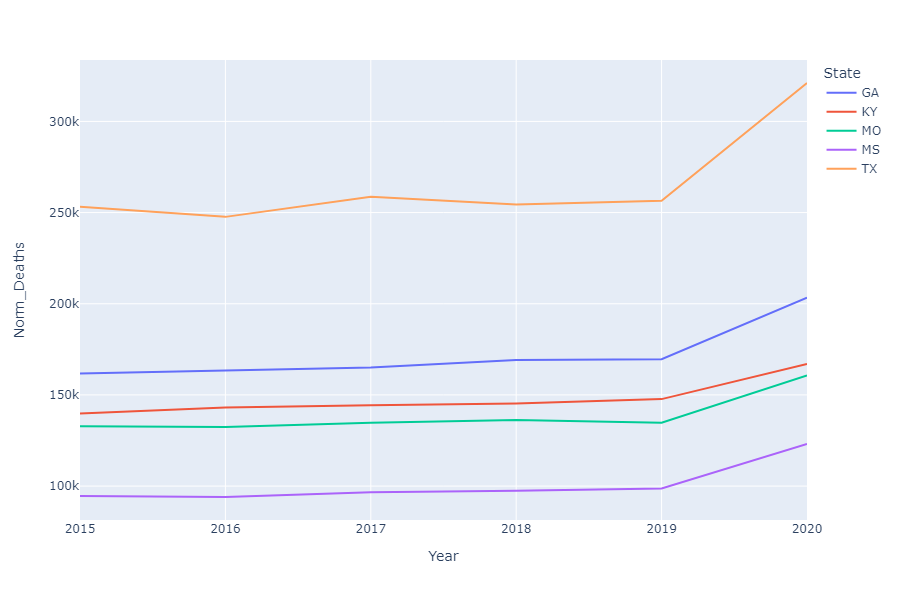

In [16]:
fig = px.line(top_five_states_increasing, x="Year", y="Norm_Deaths",color = "State")
#fig.show()
fig.write_image("stageII_images/line_5states_increasing.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

## Inference :

* Texas state has the highest population where as MS has the lowest population so the death rates are high in Texas as compared to other states.

* Since 2000 the use of opiod increased in the US , but the reports say that in texas, from 2015 there was increase in female deaths compared to male deaths.

* So from 2015 to 2019 the deaths were not increasing they were almost consistent but in 2019 there was a slight increase in the deaths. 

## Decreasing trend

In [17]:
state_last_five_years

,State,Year,Norm_Deaths,difference_norm_deaths
0,AK,2015,15417.0,0
1,AK,2016,16305.0,888
2,AK,2017,15438.0,-867
3,AK,2018,15186.0,-252
4,AK,2019,15562.0,376
...,...,...,...,...
301,WY,2016,19510.0,-624
302,WY,2017,20294.0,784
303,WY,2018,21441.0,1147
304,WY,2019,21243.0,-198


### To find top 5 states with decreasing number of Norm Deaths, we group the data by state and sum of the differnce_norm_deaths column. Then sorting by difference_norm_deaths values  from low to high we get the decreasing trend.

In [18]:
#filter state with 5 increasing states.
state_last_five_years.groupby("State",as_index = False)["difference_norm_deaths"].sum().sort_values(by = "difference_norm_deaths", ascending = True).head(5)

,State,difference_norm_deaths
7,DC,148
11,HI,197
39,RI,503
8,DE,629
30,NH,903


### Now select the states from the above table to see the decreasing trend

In [19]:
State_decrease = ["DC","HI","RI","DE","NH"]

In [20]:
top5_states_decreasing = state_last_five_years[state_last_five_years.State.isin(State_decrease)]
top5_states_decreasing

,State,Year,Norm_Deaths,difference_norm_deaths
42,DC,2015,721.0,0
43,DC,2016,737.0,16
44,DC,2017,714.0,-23
45,DC,2018,712.0,-2
46,DC,2019,696.0,-16
47,DC,2020,869.0,173
48,DE,2015,2852.0,0
49,DE,2016,2927.0,75
50,DE,2017,2964.0,37
51,DE,2018,3045.0,81


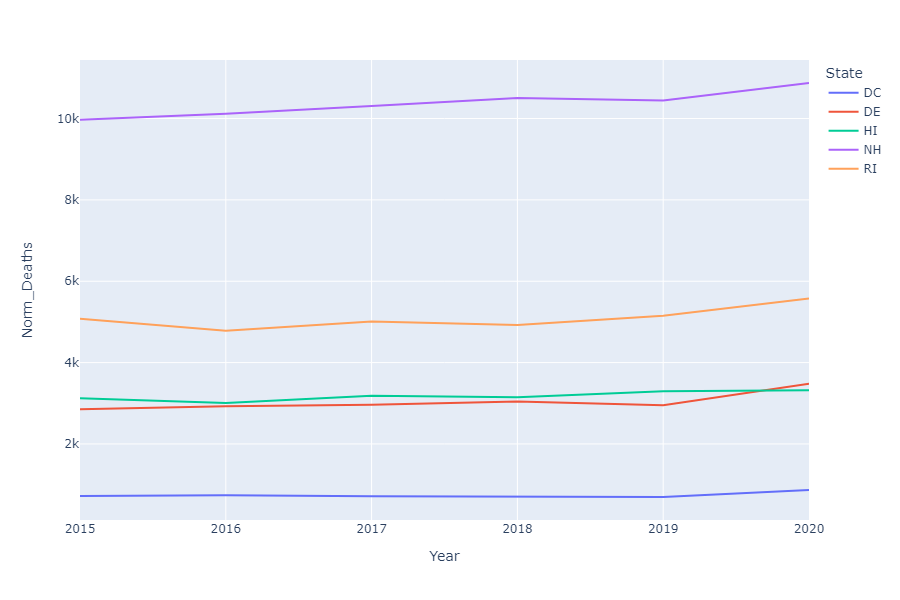

In [21]:
fig = px.line(top5_states_decreasing, x="Year", y="Norm_Deaths",color = "State")
#fig.show()
fig.write_image("stageII_images/line_state_last_five_years_five_states_decreasing.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

## Inference:

* Washington DC had the highest decrease in death rate over the period of 5 years and then the states i.e DE, HI , RI and then NH were the states in the decreasing number of Norm_Deaths. 

* The above states had special programs granted by US government such as Prescription Drug Monitoring Programs (PDMPs) which helps in reducing the rate of opiod precription.

* DC has the lowest population compared to the other 4 states which results in lowest number of opiod death. 
